In [98]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
%matplotlib inline

Next, we will try and fit the three free parameters of the Schecter function to this collected data courtesy of the COSMOS galaxy survey. 


For reference, the schecter function is defined as $n(M_{gal}) = \phi_{*}\frac{M_{gal}}{M_{*}}^{\alpha+1}e^{\frac{-M_{gal}}{M_{*}}}ln(10)$,


where the number of galaxies n is equal to this function of the mass of the galaxy tuned by the free parameters of characteristic mass scale $M_{*}$, amplitude $\phi_{*}$, and exponential cutoff $\alpha$.


To apply gradient descent to this method, we have two options, whether to approach this problem linearly (or applying the gradient descent method directly to the parameters, which we will do to quickly illustrate the flaw in this method, especially when dealing with datasets and parameters of very high orders of magniude. 


Alternatively, we can "transform" these parameters into logarithmically based units. 

In order to do so, we set each parameter equal to a base10 term, where for instance $\phi_{*} = 10^{\phi_{mag}}$ and now we can apply gradient descent to minimize our desired function (in this case, chi-squared) for $\phi_{mag}$ and the other likewise values. 



We apply the logarithmic parameter method below, and obtain the following fit, which corresponds to a chi-squared value of .../
[ best fit below]. 


Additionally, we need not fear that this result is a consequence of extremely well picked first parameters. To confirm this method's robustness, we can begin with changing what our initial values are, by changing the value of the initial kick that starts gradient descent, and plot it below. 

[plot with convergence with different random values.]

And by demonstrating how the gradient descent method still converges regardless of what we tune our initial "kick" of the function to be, we can be assured that this method is able to successfully capture 

No matter what we tune the initial kick of this function to be, the $\chi^2$ value still converges to a minima and successfully fits the Schecter function. This is one such test for an algorithm's robustness, whereas another would be to try different points along the space of possible values for $\phi_{*}$, $M_{*}$ and $\alpha$. 


This is demonstrated below, where we sample along different values of $\phi_{*}$ and still recover a good fit. 

 [link to phi plot]

Suprisingly, this test for robustness fails. When we set the intial parameter of $\phi_{*} = 10^{-1}$, we wail to find a converged function and instead see how this plot fails to reveal anything useable. 


So while we can assert the gradient descent routine's robustness on the basis of how tweaking that algorithm's hyperparameters, we see that for the Schecter function fitting, picking a resonable starting point is mandatory. If the distance between the "true" parameter and intitial is too large, we fail to see the $\chi^2$ value converge. This means that for the purpose of fitting a function such as the Schecter function by applying gradient descent of $\chi^2$, starting values matter.  


Additionally, the application of "logarithmic" stepping proved to be a valuable measure to greatly expediate (and even allow) for gradient descent to yield a good fit. If we were to try and fit this function through ordinary steps, we would never find a minima near what we have here. 

Due to the extremely high order of magnitude of $M_{*} \approx 10^{11}$ and low magnitude of $\phi_{*} \approx 10^{-2.5}$, beginning at an an initital parameter of $M_{*} = 10^{9}$ for example would never yield a result as good as done through leveraging the logarithm. 

And to further emphasize this point I cannot even produce a plot of the evolution of the chi squared value in this regime, as the chi squared error becomes nan in less than 3 iterations. As an appendix to this assignment I have created an extra file called "schecter_linear_grad_descent.py", along with the printed output of this file below, to demonstrate how poor of a method this is. 

In [99]:
cosmos = pd.read_table("../dat/smf_cosmos.dat", sep="\s+",header=None)
cosmos.rename(columns={0:"log M_gal [dex]",1:"n(M_gal) [1/dex/Volume]",2:"error in n(M_gal)"},inplace=True)


Memory of initital step size

# Minimize this function!

In [100]:
cosmos

,log M_gal [dex],n(M_gal) [1/dex/Volume],error in n(M_gal)
0,9.6,0.006871,0.000734
1,9.8,0.005688,0.000655
2,10.0,0.005491,0.000582
3,10.2,0.004989,0.000568
4,10.4,0.004780,0.000548
5,10.6,0.004230,0.000565
6,10.8,0.003651,0.000494
7,11.0,0.002253,0.000371
8,11.2,0.001117,0.000208
9,11.4,0.000418,0.000095


In [101]:

def schecter(M,phi,Mstar,alpha):
    """Calculates the schecter function. 
    
    """
    from numpy import log,exp,power
    M = power(10.0,M)
    Mstar = power(10.0,Mstar)
    phi = power(10.0,phi)
    return phi *  exp(-M/Mstar) * power(M/Mstar,alpha+1) * log(10) #log 10 smooths binning


def chisquared(phi,Mstar,alpha,f=schecter,cosmos = cosmos):
    
    M = cosmos['log M_gal [dex]']
  #  print("Mstar: ", Mstar)
    observed = f(M,phi,Mstar,alpha)
    
    expected = cosmos['n(M_gal) [1/dex/Volume]']
    
    error = cosmos['error in n(M_gal)']
    
    return sum((observed - expected)**2 / error **2) 

f = chisquared

def grad_desc(f,a0,b0,c0,gamma=.01,talk=True,initial_step = 1e-3):
    
    tol = gamma
    a = a0 + initial_step
    b = b0 + initial_step
    c = c0 + initial_step
    chi_squareds = []
    while True:
        
        chi_squareds.append(f(a,b0,c0)) #obtain the chi squared term
        deriv_a = (f(a,b0,c0) - f(a0,b0,c0)) / (a - a0)
        
        deriv_b = (f(a0,b,c0) - f(a0,b0,c0)) / (b - b0)

        deriv_c = (f(a0,b0,c) - f(a0,b0,c0)) / (c - c0)
        
        a1 = a - gamma * deriv_a
        b1 = b - gamma * deriv_b
        c1 = c - gamma * deriv_c
        if talk:
            print(f(a,b0,c0))
        if abs(a1 - a) + abs(b1-b) + abs(c1 - c) < tol:
            return a1,b1,c1,chi_squareds
        
        a0 = a
        a = a1
        
        b0 = b
        b = b1
        
        c0 = c
        c = c1
        
        
a1,b1,c1,chi_squareds = grad_desc(chisquared,-2.5,10.5,-1.01,gamma=1e-5,initial_step=.01)

130.1281900656108
125.81090427464653
124.09046677025563
122.43218772266064
120.82755055966092
119.27201523906689
117.76126831305797
116.2911818579834
114.85783446804065
113.45752971314245
112.0868088428291
110.74245811346387
109.42151132437628
108.12124820232842
106.83918929167413
105.5730879991206
104.32092041232251
103.080873465956
101.85133197232828
100.63086497055019
99.41821178263399
98.21226809975809
97.01207235976416
95.81679261945314
94.62571407355186
93.43822732692354
92.25381748786421
91.07205411803474
89.8925820483262
88.7151130492327
87.53941832846648
86.36532181696434
85.19269419644442
84.02144761663752
82.85153104769834
81.6829262125721
80.51564404480833
79.34972161910027
78.1852195043736
77.0222194922839
75.86082265730289
74.70114770803896
73.54332959288061
72.38751832642173
71.2338780063499
70.0825859934825
68.93383223044627
67.78781867704359
66.6447588426725
65.50487739826382
64.36840985204545
63.235602275113266
62.106711064232194
60.982002730580426
59.86175370427074
5

4.239402596628259
4.2338228239147195
4.228266451769201
4.222733382510326
4.217223518856802
4.211736763925993
4.206273021232373
4.200832194685883
4.1954141885904725
4.190018907642582
4.184646256929581
4.179296141928235
4.173968468503252
4.168663142905664
4.163380071771461
4.158119162120019
4.152880321352548
4.147663457250715
4.142468477975061
4.137295292063612
4.132143808430336
4.127013936363719
4.121905585525233
4.116818665947935
4.111753088034992
4.106708762558211
4.101685600656659
4.096683513835176
4.091702413962917
4.086742213271961
4.081802824355832
4.076884160168163
4.071986134021228
4.067108659584514
4.06225165088335
4.057415022297455
4.05259868855963
4.047802564754303
4.043026566316121
4.038270609028622
4.033534609022839
4.02881848277589
4.0241221471096775
4.019445519189488
4.014788516522611
4.010151056957003
4.0055330586799816
4.000934440216824
3.996355120429445
3.991795018515061
3.9872540540048647
3.9827321467627312
3.9782292169837965
3.973745185193254
3.9692799722450096
3.964

3.107517341909062
3.1066855706181067
3.1058572779500646
3.1050324493055754
3.104211070146795
3.103393125997101
3.102578602440839
3.1017674851230734
3.1009597597493372
3.1001554120853427
3.0993544279568
3.0985567932490548
3.097762493906959
3.0969715159345492
3.096183845394772
3.095399468409323
3.0946183711583037
3.093840539880009
3.093065960870747
3.092294620484484
3.0915265051326895
3.0907616012840418
3.089999895464211
3.0892413742555926
3.0884860242971133
3.0877338322839307
3.086984784967274
3.0862388691541316
3.0854960717070403
3.084756379543888
3.0840197796376323
3.0832862590160963
3.082555804761709
3.081828404011305
3.081104043955871
3.0803827118403397
3.07966439496335
3.078949080677019
3.0782367563867195
3.077527409550843
3.0768210276806114
3.0761175983397884
3.0754171091445217
3.0747195477630944
3.0740249019157315
3.0733331593743314
3.0726443079622596
3.0719583355541733
3.0712752300757704
3.0705949795035896
3.069917571864774
3.0692429952368747
3.0685712377476277
3.067902287574755

2.938105011177227
2.9379802267311153
2.937855961262146
2.9377322126072527
2.9376089786124044
2.9374862571326035
2.9373640460317967
2.9372423431828745
2.937121146467629
2.937000453776661
2.9368802630094217
2.936760572074146
2.9366413788877943
2.9365226813760446
2.936404477473257
2.9362867651223734
2.936169542274999
2.936052806891257
2.935936556939823
2.935820790397854
2.9357055052509313
2.9355906994930856
2.935476371126727
2.935362518162616
2.9352491386198167
2.935136230525665
2.9350237919157554
2.9349118208338925
2.934800315332038
2.9346892734703003
2.9345786933169036
2.9344685729481426
2.9343589104483314
2.9342497039098285
2.934140951432915
2.9340326511258263
2.933924801104712
2.9338173994935914
2.9337104444243125
2.9336039340365283
2.9334978664776705
2.9333922399028975
2.93328705247509
2.9331823023648225
2.933077987750261
2.9329741068172184
2.9328706577590764
2.9327676387767623
2.9326650480787375
2.9325628838809212
2.9324611444066937
2.932359827886849
2.9322589325595865
2.93215845667

2.912459680990889
2.912441429466798
2.912423253634215
2.9124051531789292
2.91238712778803
2.9123691771499547
2.912351300954401
2.9123334988923686
2.912315770656109
2.9122981159392016
2.9122805344364764
2.9122630258440316
2.9122455898592214
2.912228226180663
2.912210934508232
2.9121937145430628
2.912176565987501
2.912159488545152
2.9121424819208386
2.9121255458206474
2.9121086799518436
2.912091884022926
2.912075157743593
2.9120585008247453
2.9120419129785313
2.9120253939182477
2.91200894335839
2.9119925610146646
2.911976246603935
2.9119599998442407
2.91194382045481
2.9119277081560364
2.911911662669472
2.911895683717821
2.9118797710249296
2.911863924315823
2.9118481433166603
2.9118324277546934
2.91181677735837
2.911801191857224
2.9117856709819123
2.911770214464258
2.911754822037154
2.911739493434618
2.911724228391765
2.9117090266448122
2.9116938879310856
2.911678811989009
2.911663798558089
2.9116488473788986
2.9116339581930664
2.9116191307433366
2.9116043647735186
2.9115896600284747
2.91

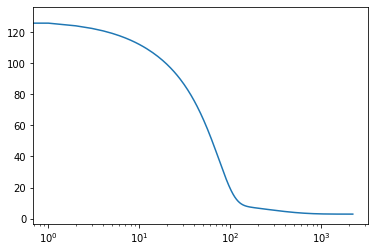

In [102]:

plt.plot(chi_squareds)
#plt.yscale('log')
plt.xscale('log')

In [103]:
a1,b1,c1

(-2.5663882043663118, 10.9750444008515, -1.0075948629462828)

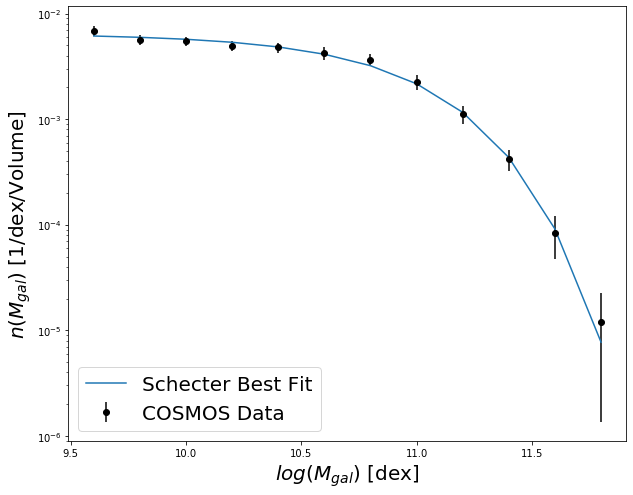

In [26]:
plt.figure(figsize=(10,8))
#Plot to show how well fit. 
plt.plot(cosmos['log M_gal [dex]'], schecter(cosmos['log M_gal [dex]'],phi=a1,Mstar=b1,alpha=c1),label='Schecter Best Fit')
#plt.plot(cosmos['M_gal'], schecter(cosmos['M_gal'],phi=,Mstar=1e11,alpha=-1.01))
#plt.plot(df['log M_gal [dex]'],df['n(M_gal) [1/dex/Volume]'],'bo')
plt.errorbar(x = cosmos['log M_gal [dex]'],y=(cosmos['n(M_gal) [1/dex/Volume]']),
             yerr=cosmos['error in n(M_gal)'],color='k',marker='o',ls='',label='COSMOS Data')
#plt.title("Fitted Schecter Function ($\chi^2 = 2.9$)",)
plt.xlabel("$log(M_{gal})$ [dex]",fontsize =20)
plt.ylabel('$n(M_{gal})$ [1/dex/Volume]',fontsize =20)
plt.yscale('log')
plt.legend(fontsize=20)
#plt.xscale('log')

To test for the "robustness" of this gradient descent method, we will observe the convergence rate of the routine, given different starting points, and different step sizes. 

2598
2549
2543


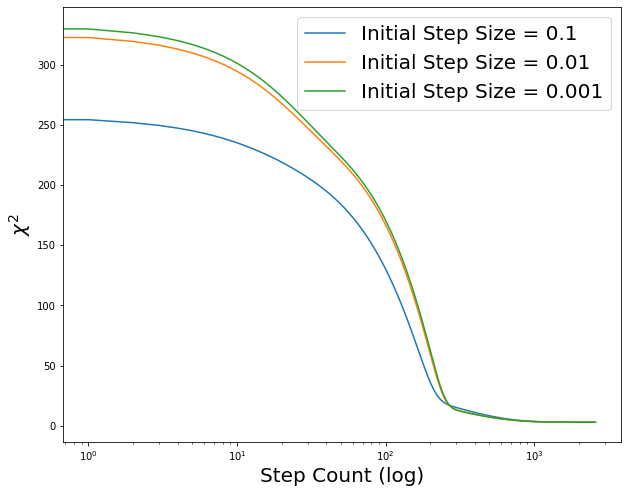

In [57]:
#given different step sizes:
plt.figure(figsize=(10,8))

initial_steps = [.1,.01,.001]

for initial_step in initial_steps:
    a1,b1,c1,chi_squareds = grad_desc(chisquared,a0=-2.5,b0=10,c0=-1.1,gamma=1e-5,initial_step = initial_step,talk=False)
    print(len(chi_squareds))
    plt.plot(chi_squareds,label = 'Initial Step Size = ' + str(initial_step))
    plt.legend(fontsize = 20)
    plt.xlabel('Step Count (log)',fontsize = 20)
    plt.ylabel('$\chi^2$',fontsize = 20)
    
plt.xscale('log')


3
2791
2108


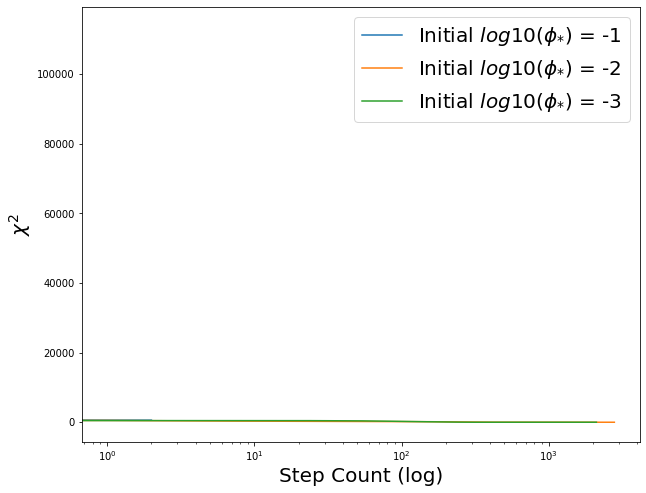

In [58]:
#given different step sizes:
plt.figure(figsize=(10,8))

initial_phi_mags = [-1,-2,-3]

for initial_phi_mag in initial_phi_mags:
    a1,b1,c1,chi_squareds = grad_desc(chisquared,a0=initial_phi_mag,b0=10,c0=-1.1,gamma=1e-5,initial_step = .01,talk=False)
    print(len(chi_squareds))
    plt.plot(chi_squareds,label = 'Initial $log10(\phi_{*})$ = ' + str(initial_phi_mag))
    plt.legend(fontsize = 20)
    plt.xlabel('Step Count (log)',fontsize = 20)
    plt.ylabel('$\chi^2$',fontsize = 20)
    
plt.xscale('log')


Suprisingly, this test for robustness fails. When we set the intial parameter of $\phi_{*} = 10^{-1}$, we wail to find a converged function and instead see how this plot fails to reveal anything useable. 


So while we can assert the gradient descent routine's robustness on the basis of how tweaking that algorithm's hyperparameters, we see that for the Schecter function fitting, picking a resonable starting point is mandatory. If the distance between the "true" parameter and intitial is too large, we fail to see the $\chi^2$ value converge. This means that for the purpose of fitting a function such as the Schecter function by applying gradient descent of $\chi^2$, starting values matter.  

Additionally, the application of "logarithmic" stepping proved to be a valuable measure to greatly expediate (and even allow) for gradient descent to yield a good fit. If we were to try and fit this function through ordinary steps, we would never find a minima near what we have here. 

Due to the extremely high order of magnitude of $M_{*} \approx 10^{11}$ and low magnitude of $\phi_{*} \approx 10^{-2.5}$, beginning at an an initital parameter of $M_{*} = 10^{9}$ for example would never yield a result as good as done through leveraging the logarithm. 

And to further emphasize this point I cannot even produce a plot of the evolution of the chi squared value in this regime, as the chi squared error becomes nan in less than 3 iterations. As an appendix to this assignment I have created an extra file called "schecter_linear_grad_descent.py", along with the printed output of this file below, to demonstrate how poor of a method this is. 

In [93]:

def schecter(M,phi,Mstar,alpha):
    """Calculates the schecter function. 
    
    """
    from numpy import log,exp,power
#    M = power(10.0,M)
 #   Mstar = power(10.0,Mstar)
 #   phi = power(10.0,phi)
    return phi *  exp(-M/Mstar) * power(M/Mstar,alpha+1) * log(10) #log 10 smooths binning


def chisquared(phi,Mstar,alpha,f=schecter,cosmos = cosmos):
    
    M = cosmos['log M_gal [dex]']
  #  print("Mstar: ", Mstar)
    observed = f(M,phi,Mstar,alpha)
    
    expected = cosmos['n(M_gal) [1/dex/Volume]']
    
    error = cosmos['error in n(M_gal)']
    
    return sum((observed - expected)**2 / error **2) 

f = chisquared

def grad_desc(f,a0,b0,c0,gamma=.01,talk=True,initial_step = 1e-3):
    
    tol = gamma
    a = a0 + initial_step
    b = b0 + initial_step
    c = c0 + initial_step
    chi_squareds = []
    while True:
        
        chi_squareds.append(f(a,b0,c0)) #obtain the chi squared term
        deriv_a = (f(a,b0,c0) - f(a0,b0,c0)) / (a - a0)
        
        deriv_b = (f(a0,b,c0) - f(a0,b0,c0)) / (b - b0)

        deriv_c = (f(a0,b0,c) - f(a0,b0,c0)) / (c - c0)
        
        a1 = a - gamma * deriv_a
        b1 = b - gamma * deriv_b
        c1 = c - gamma * deriv_c
        if talk:
            print("chi squared =",f(a,b0,c0))
        if abs(a1 - a) + abs(b1-b) + abs(c1 - c) < tol:
            return a1,b1,c1,chi_squareds
        
        if type(f(a,b0,c0)) == type(np.nan):
            return a1,b1,c1,chi_squareds

        a0 = a
        a = a1
        
        b0 = b
        b = b1
        
        c0 = c
        c = c1
        
        
a1,b1,c1,chi_squareds = grad_desc(chisquared,-.01,10*7,-1.01,gamma=1e-24,initial_step=10000)

chi squared = 3.860400530454303e+18


In [96]:
grad_desc(chisquared,10**-2.57,10*10.5,-1.01,gamma=1e-8,initial_step=1e-3)

chi squared = 588279.4218416722


(-2.7600630496271346,
 105.00099270782387,
 -0.995319985356638,
 [588279.4218416722])

So even in attempts when the initial parameters are very close to their true values, this method still fails after one attempt of gradient descent. 